# Problem Set 5

### Learning Objective:

- Create Python code to automate a given task.

### Overview:

This problem set assesses your ability to construct a simulation model by probabilistic sampling, as discussed in the lectures for Week 5. Unlike the previous two problem sets, you are no longer required to give your steps in algorithmic thinking, but can simply include your final solutions here. (Nevertheless, you are still encouraged to apply the steps of algorithmic thinking on your own when solving the difficult problems, and it is probably faster overall to go through those steps in a systematic way rather than trying to jump steps and code everything at once, as the steps make debugging much faster.)

### Grading

There are three possible scores you can get from submitting this assignment on time (submitting a blank file or one without any apparent effort does not count). Note that the rubric is designed to incentivize you to go for 100% mastery of the material, as the little details matter a lot in programming. 

| Grade | Description |
|--|--|
| 5 out of 5 | Perfect submission with no significant errors. | 
| 4 out of 5 | Near perfect submission with one or more significant errors. |
| 2 out of 5 | Apparent effort but far from perfect. |

## Q1. Simulating Stock Prices

This question asks you to simulate the weekly price of a certain stock, given the initial price, the expected change in price per week, the standard deviation per week, and the number of weeks to simulate.

**Write a function called "simulatePrice" with the following input arguments:**

- **initial**: a positive number representing the price in Week 0.
- **mu**: the expected change in price from one week to the next.
- **sigma**: the standard deviation in the change in price.
- **N**: the number of weeks to simulate.

The function should return a Pandas Series containing the simulated price of the stock from Week 0 through N. (Note that the initial price is the first entry and is not simulated.) 

You should assume the following probabilistic model. Suppose the price in week $t-1$ is $p_{t-1}$, then the price in week $t$ is given by

$$p_t = \begin{cases}
0 & \text{ if $p_{t-1} =0$, } \\
\max(0, p_{t-1}+\epsilon_t) & \text{ if $p_{t-1} > 0 $,}
\end{cases}$$
where $\epsilon_t$ is independently and Normally distributed with mean **mu** and standard deviation **sigma**, as given by the input arguments.

In [1]:
# Your code here.
import pandas as pd
import numpy as np
def simulatePrice(initial, mu, sigma, N):
    p = [initial]
    for i in range(0,N):
        if p[-1] > 0:
            e = random.normal(mu, sigma)
            p.append(max(0,p[-1]+e))
        elif p[-1] == 0:
            p.append(0)
    pt = pd.Series(p)
    return pt 

The following output shows the result of running the code with initial price of 1, mu=0.01, sigma=0.2, and N=5 weeks.

In [2]:
from numpy import random
random.seed(0)
simulatePrice(1,0.01,0.2,5)

0    1.000000
1    1.362810
2    1.452842
3    1.658590
4    2.116768
5    2.500280
dtype: float64

The following plots one random sequence of 52 weeks.

<AxesSubplot:title={'center':'Simulated stock price'}>

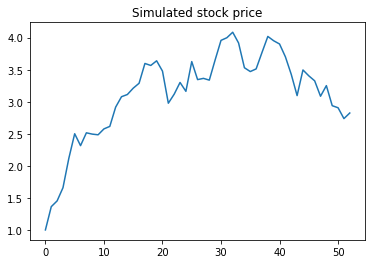

In [20]:
random.seed(0)
simulatePrice(1,0.01,0.2,52).plot(title='Simulated stock price')

The following plots another random sequence and illustrates that once price hits zero, it stays there forever.

<AxesSubplot:title={'center':'Simulated stock price'}>

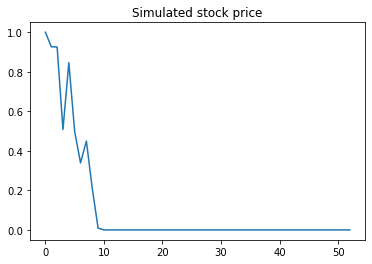

In [21]:
random.seed(2)
simulatePrice(1,0.01,0.2,52).plot(title='Simulated stock price')

## Q2. Simulating a Strategy for Stock Trading

This question asks you to evaluate an algorithmic trading strategy using a time series of stock prices, similar to the output in Q2.

**Write a function called "simulateTrades" with the following input arguments:**

- **prices**: a pandas Series of stock prices, with each entry representing the price of the stock in a given week. You can assume that all given prices are non-negative (i.e. $\ge 0$).
- **cash**: a positive decimal number designating the total amount of money you have at the very beginning, before any trades occur in Week 0. You use up cash when buying stocks and gain cash when selling stocks.
- **p_L**: a threshold on the price to purchase. As soon as the stock price is less than or equal to this price, assuming that the price is non-zero, you would purchase as many shares as you can using all the cash you have. (**Note: you can only purchase an integer number of shares.** You can round down a number $n$ using the code `int(n)`. i.e., `int(3.6)` would yield 3.) If the price is equal to zero, then you would not purchase.
- **p_H**: a threshold on the price to sell. As soon as the stock price is greater than or equal to this price, you would sell all the shares you have and convert it to cash. 

Assume that at the beginning, you have zero shares of the stock. Moreover, in the last week, you have to sell all the shares you have regardless of the price. **The function should return (not print) the total amount of cash you have at the end of all periods.** 

For example, suppose that `prices=pd.Series([1.1,1.3,0.8,1.3,1.6,0.4])`. Then

- `simulateTrades(prices, 8, 0.8, 1.6)` returns 16.0 because you would buy 10 shares when the price hits 0.8 and sell then for 1.6 each when the price reaches 1.6. In the last period, you buy 40 shares at 0.4 but sell everything again at that price, so your cash doesn't change.
- `simulateTrades(prices, 8, 0.8, 1.7)` returns 4.0 because while the sell price of 1.7 is never reached, you are stuck with 10 shares, which you are forced to sell in the last period for 0.4 each.
- `simulateTrades(prices, 10, 0.8, 1.6)` returns 19.6 because you buy 12 shares when the price reaches 0.8, with 0.4 cash left, and you sell all 12 shares at a price of 1.6. Your ending cash is $0.4+1.6 \times 12=19.6$.
- `simulateTrades(prices, 8, 0.7, 1.6)` returns 8.0 because the price is never low enough for you to buy, so you end up with the same amount of cash you had at the beginning.
- `simulateTrades(prices, 8, 0.8, 1.2)` returns 13.0 because you buy the 10 shares when the price hits 0.8 and sell everything when the price hits 1.3.
- `simulateTrades(prices, 11, 1.2, 1.3)` returns 21.0 because you immediately buy 10 shares since the opening price of 1.1 is lower than 1.2. You sell these shares when the price hits 1.3, and now you have 13 dollars of cash. Once the price goes down to 0.8, you buy 16 shares, and have 0.2 in cash left. You sell those 16 shares when the price hits 1.3, so the final cash is $0.2+16 \times 1.3 = 21.0$.

In [43]:
# Your code here.
def simulateTrades(prices, cash, p_L, p_H):
    shares = 0
    l = len(prices)
    for i in range(l):
        if prices[i] <= p_L:
            shares += int(cash/prices[i])
            cash = cash - prices[i] * int(cash/prices[i])
        elif prices[i] >= p_H and shares != 0:
            cash = cash + shares * prices[i]
            shares = 0
    cash = cash + shares * prices[l-1]
    return cash

In [44]:
# Sample runs
import pandas as pd
prices=pd.Series([1.1,1.3,0.8,1.3,1.6,0.4])
simulateTrades(prices, 8, 0.8, 1.6)

16.0

In [45]:
simulateTrades(prices, 8, 0.8, 1.7)

4.0

In [46]:
simulateTrades(prices, 10, 0.8, 1.6)

19.6

In [47]:
simulateTrades(prices, 8, 0.7, 1.6)

8.0

In [48]:
simulateTrades(prices, 8, 0.8, 1.2)

13.0

In [49]:
simulateTrades(prices, 11, 1.2, 1.3)

21.0

## Q3. Simulating Demand under Price Promotions

Suppose that a grocery store offers promotions on a certain product with probability $0.3$ every month, independent from other months. Conditional on whether there is a promotion in a month and on the promotion pattern of previous months, the monthly demand for the product is independently and normally distributed with the following parameters. (Assume that demand can take any decimal number and ignore the issue of negative demand.)

| Month | Mean ($\mu$) | Standard Deviation ($\sigma$) |
|--|--|--|
| No promotion | 500 | 100 |
| Promotion | 800 + 100$t$ | 150 |

In the above table, $t$ is the number of months without a promotion since the last promotion. For example, if last month had a promotion, then $t=0$. If the neither of the last two months had a promotion but the month before had one, then $t=2$.

**Write a function called "simulateDemand" with one input argument:**

- **n**: the number of months to simulate. (Assume this is at least 1).

**The function should return a list of $n$ numbers corresponding to $n$ consecutive months of simulated demand for the product.** Assume that just prior to the months in the simualtion, there was a promotion, so $t=0$ in the beginning. 

In [52]:
# Your code here.
import pandas as pd
import numpy as np
def simulateDemand(n):
    t = 0
    demand=[]
    promo=pd.Series(random.binomial(1,0.3,size=n))
    for i in promo:
        if i == 0:
            demand.append(random.normal(500,100))
            t += 1
        else:
            demand.append(random.normal(800+100*t,150))
            t = 0
    return demand       

<AxesSubplot:title={'center':'Simulated demand for 36 months'}>

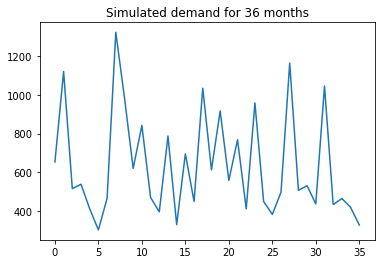

In [53]:
# Test code (Your graph probably looks different because of randomness)
import pandas as pd
from numpy import random
random.seed(0)
pd.Series(simulateDemand(36))\
    .plot(title='Simulated demand for 36 months')